In [21]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns # Creación de gráficas y visualización de datos
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [25]:
# Cargue de data
file_path = r"./car details.csv"
# Preprocesamiento de datos
# Convertir los datos en un DataFrame
df = pd.read_csv(file_path)
df.info()  # Para ver los tipos de datos y valores faltantes
df.describe()  # Resumen estadístico
df.head()  # Visualizar las primeras filas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [27]:
# Limpieza de Datos
# Verificar si hay valores nulos en las columnas
df.isnull().sum()  # Para ver la cantidad de valores nulos


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [29]:
# Conversión de Datos Categóricos
# convertir en valores numéricos para que el modelo pueda procesarlas
df = pd.get_dummies(df, columns=['seller_type', 'transmission'], drop_first=True)


In [31]:
# convertir en la edad del automovil
df['Car_Age'] = 2024 - df['year']
df.drop(['year'], axis=1, inplace=True)  # Eliminamos la columna 'Year' original
df.columns


Index(['name', 'selling_price', 'km_driven', 'fuel', 'owner',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'Car_Age'],
      dtype='object')

<Axes: xlabel='Car_Age', ylabel='selling_price'>

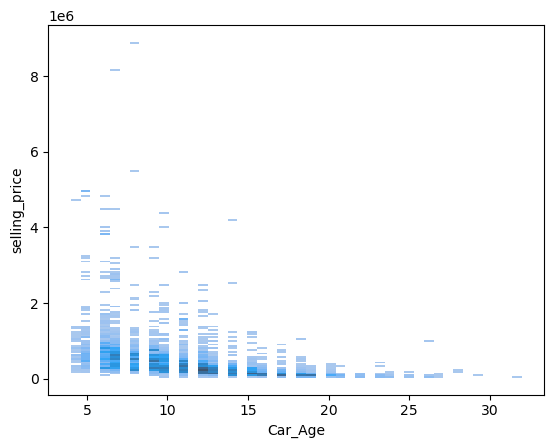

In [33]:
# Variables independientes (Car_Age) y dependiente (Selling_Price)
X = df[['Car_Age']]
y = df['selling_price']

sns.histplot(data=df, x='Car_Age', y='selling_price', multiple='stack')

Intercepto (β0): 1123880.360409553
Coeficiente (Car_Age, β1): [-56810.04163345]


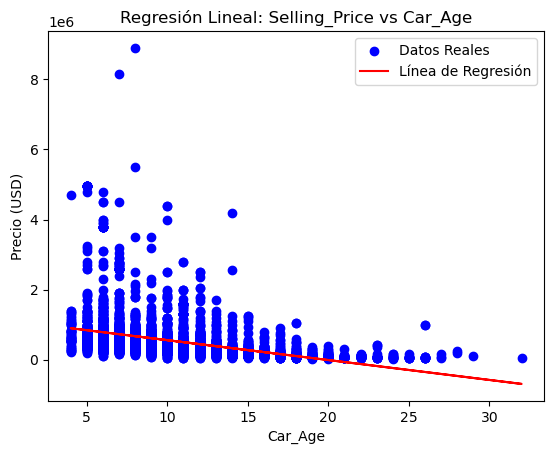

In [35]:
# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_  # Pendientes (Car_Age)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Car_Age, β1): {beta_1}")

# Visualizar la regresión (opcional para datos simples)
plt.scatter(df['Car_Age'], y, color='blue', label='Datos Reales')
plt.plot(df['Car_Age'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Selling_Price vs Car_Age')
plt.xlabel('Car_Age')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

In [37]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[3], [2]])  # Nuevos valores (Car_Age - años del carro)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Car_Age: {nuevo_X[i][0]} años): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Car_Age: 3 años): 953450.24 USD
Predicción 2 para (Car_Age: 2 años): 1010260.28 USD


C:\Users\power computer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Regresion Lineal Multiple

Intercepto (β0): 1128228.9198780118
Coeficiente (Car_Age, β1): -55511.65102899498
Coeficiente (km_driven, β2): -0.27958568957796653


C:\Users\power computer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


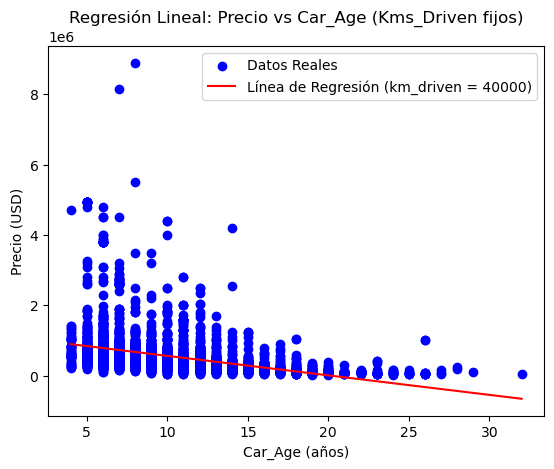

In [41]:
# Variables independientes (Car_Age y Kms_Driven) y dependiente (Selling_Price)
X = df[['Car_Age', 'km_driven']]
y = df['selling_price']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1, beta_2 = modelo.coef_  # Pendientes (Car_Age y Kms_Driven)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Car_Age, β1): {beta_1}")
print(f"Coeficiente (km_driven, β2): {beta_2}")

# Visualización de la regresión (manteniendo constante el número de Kms_Driven)
Kms_Driven_fijas = 40000  # Fijar el número de Kms_Driven en 40000 para el gráfico
Car_Age_range = np.linspace(df['Car_Age'].min(), df['Car_Age'].max(), 100)

# Predecir manteniendo los Kms_Driven constantes
predicciones_fijas = modelo.predict(np.column_stack((Car_Age_range, np.full_like(Car_Age_range, Kms_Driven_fijas))))

# Graficar los datos reales y la línea de regresión
plt.scatter(df['Car_Age'], y, color='blue', label='Datos Reales')
plt.plot(Car_Age_range, predicciones_fijas, color='red', label=f'Línea de Regresión (km_driven = {Kms_Driven_fijas})')
plt.title('Regresión Lineal: Precio vs Car_Age (Kms_Driven fijos)')
plt.xlabel('Car_Age (años)')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

In [43]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[3, 200], [5, 2500]])  # Nuevos valores (Car_Age, Kms_Driven)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Car_Age: {nuevo_X[i][0]} años, Kms_Driven: {nuevo_X[i][1]}): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Car_Age: 3 años, Kms_Driven: 200): 961638.05 USD
Predicción 2 para (Car_Age: 5 años, Kms_Driven: 2500): 849971.70 USD


C:\Users\power computer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [138]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Datos (suponiendo que tienes el dataset con 30 ejemplos de Años, Kms y precio)
# Por ejemplo, los datos se pueden construir como arrays o un DataFrame

X = df[['Car_Age', 'km_driven']]
y = df['Selling_Price']

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, y)

# Realizar predicciones en los datos de entrenamiento
predicciones = model.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(y, predicciones)  # Coeficiente de determinación R²
mae = mean_absolute_error(y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(y, predicciones)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.08805034494020436
Error Absoluto Medio (MAE): 3.0855868338103214
